# COGS 118A- Project Checkpoint

# Names

- Yash Potdar
- Maitrayee Keskar
- Gauri Samith
- Kyra Hulse

# Abstract 
In this project, our goal is to accurately classify and segment objects within an image. This is a common problem in computer vision, as self-driving cars need to segment objects in their visual field in order to drive, or in AR surgery, where cameras must identify and classify organs. We will be using Microsoft’s Common Objects in Context (COCO) dataset, which contains around 330,000 images with 91 objects commonly seen in everyday life. We will be implementing image segmentation using a region-based CNN (R-CNN). The R-CNN algorithm generates various region proposals, computes features, and subsequently classifies regions. In order to measure success, we will use the Jaccard Index, also known as the Intersection over Union (IoU) metric, which compares the ratio of the intersection area and union area between the targeted and predicted segmentation. We aim to use the pre-trained Mask R-CNN as a baseline model and will gauge our model’s performance by comparing their evaluation metrics to the baseline.

# Background

Object classification is very important for many everyday tasks, such as self driving, and AR surgery improvements. Previous work has had great accuracy classifying images, however, these are often iconic images, in the same orientation, with little background distractions <a name="lin"></a>[<sup>[1]</sup>](#lin). Additionally, great work has been done creating bounding boxes around objects, however, segmentation is much more useful than bounding boxes, as it shows exactly where in the image the object is, rather than just the general area <a name="lin"></a>[<sup>[1]</sup>](#lin). 

Some of the models for Instance segmentation include U-Net, Mask R-CNN, FastFCN, Gated-SCNN, DeepLab, etc. These models are built for different use cases. The U-Net model upon visualization, looks like the letter U <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). The left part of the architecture is the contractive part to capture context and the right part is called the expansive part for better localization <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). The Mask R-CNN model is trained on the COCO dataset and the model classifies every pixel into a particular class <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). Every region of interest gets a segmentation mask <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). 

There has been a lot of research involving the development of new techniques for the task of image segmentation. Some of these works include OCR (Object-Contextual Representations), FCN, etc. In the case of OCR, the task is divided into three parts where the image is first coarsely divided into the object classes using ResNet or HRNet <a name="yuan"></a>[<sup>[3]</sup>](#yuan). After that, the representation for each object is estimated by aggregating the representations of the pixels in the corresponding object regions <a name="yuan"></a>[<sup>[3]</sup>](#yuan). This is followed by the augmentation of the pixels with OCR <a name="yuan"></a>[<sup>[3]</sup>](#yuan).  

In terms of identifying objects and placing bounding boxes around them, there have been models like CornerNet and CenterNet. The CornerNet model predicts two corners (top left and bottom right) of the object and then uses them to place bounding boxes around the object in the image <a name="law"></a>[<sup>[3]</sup>](#law). The CenterNet model detects the centers of the objects and then regresses to the object key points, if any <a name="zhou"></a>[<sup>[5]</sup>](#zhou). It predicts an offset for the center of the object to better capture it and then also predicts the width and height of the bounding box for the object <a name="zhou"></a>[<sup>[5]</sup>](#zhou). Using these predictions, the model forms the bounding boxes around the detected object <a name="zhou"></a>[<sup>[5]</sup>](#zhou).

# Problem Statement

There are many situations where machines need to identify different objects in a scene. For example, self-driving cars need to identify street signs and pedestrians, while AR surgery cameras need to identify nerves and organs. Therefore, we need machines to identify each object with a definable boundary (“things” as opposed to “stuff” with ambiguous boundaries such as the sky or ground), classify each object category, and segment each instance of each object (or determine which pixels are part of each object). This task is quantifiable - we have a classification and boundary detection task - measurable - accuracy in both classification and segmentation - and replicable - any scene in everyday life has objects that can be identified and their boundaries determined.

We'll be honing in on object categories that are most relevant for autonomous driving. From the 91 object labels, we will reduce these to labels that are relevant to driving. During EDA, we will plot the distribution of occurrences for each object category and use these results to further reduce this to include the top categories. The dataset would be large enough to use validation sets to determine the hyperparameters within a model and test sets to compare models.

# Data

We will be utilizing [Microsoft’s Common Objects in Context (COCO)](https://cocodataset.org/#overview) dataset to accomplish this image segmentation and classification task <a name="coco"></a>[<sup>[6]</sup>](#coconote). We selected this dataset because it is a large-scale dataset that is used in computer vision applications and can be used to determine which models can best classify and segment objects. This dataset also contains objects in context. For example, these images are more realistic and less lab-controlled because they are taken in a natural setting, where there are generally multiple types of objects in a single image. For example, in [image 423349](https://cocodataset.org/#explore?id=423349) in COCO, there are people, a large clock, and a stop sign.

The dataset contains 91 common object labels, such as ‘person’, ‘car’, ‘traffic light’, ‘cow’, and ‘bottle’. In the dataset, there are around 330,000 images with 2.5 million labeled objects. In our segmentation task, we aim to determine the objects within the image and create a boundary for that object within the image. Therefore, each image we test on will likely have multiple objects being classified.

One concern we must address is the unbalanced classes. As seen in this [tutorial](https://blog.roboflow.com/coco-dataset/)<a name="solawetz"></a>[<sup>[7]</sup>](#solawetznote) about COCO, there are some overrepresented classes such as “person”, “car”, and “chair”, while there are several underrepresented classes like “cat”, “laptop”, and “refrigerator”. Although the classifier may work well when identifying the overrepresented or aptly represented objects, the data imbalance could lead to issues when segmenting and classifying the underrepresented objects. We will need to specially handle this data by undersampling the majority class or oversampling the minority class. 

# Proposed Solution

For the purpose of solving an image classification and detection task, machine learning and deep learning algorithms are a very common route. Given that we require the machine to clearly set a boundary and identify the class/category of the object, supervised learning lets the model know the correct classes and their associated feature distributions in advance. Convolutional Neural Networks (CNNs) are a useful approach as they take in input images, assign importance (as learn weights and biases) to different objects in the image and differentiate between different images based on feature distributions for each class of objects. 


Unlike classification, object detection presents a variable output layer based on the number of occurrences of the objects of interest in the input. The model would need to sweep different regions of different sizes in the image in order to detect and draw bounding boxes around the required objects. We plan to use a Region-based CNN (R-CNN) which generates a few thousand region proposals using the Selective Search Algorithm. These regions are combined together in a matrix, fed into a CNN to extract features, and then passed on to an SVM which classifies the objects. 


There were several implementations of the R-CNN that are available to test out including but not limited to Mask R-CNN, FRCNN, etc. We are choosing to begin with a pre-trained Mask R-CNN, which was trained on the COCO dataset. Apart from just a bounding box, the model creates an additional mask around the detected object in order to increase classification accuracy by segmentation. After evaluating the performance of this model using IOU and F1 score, we will set it as our baseline standard. We will further explain these metrics in the Evaluation Metric section of the proposal. Moving forward, we had three different paths depending on the evaluation results:

* Add to model depth (additional layers)
* Perform additional feature engineering/extract a different kind of feature
* Choose a different model (e.g Fast FCN) and compare performance

# Evaluation Metrics
For the task of Image Segmentation, some of the evaluation metrics commonly used are the Pixel accuracy metric, the Intersection over Union (IoU), and the Dice Co-efficient(F1-Score). The Pixel accuracy metric calculates the percentage of correctly classified pixels in the image. The problem with this metric is that when there is a class imbalance in the image, the metric gives a high accuracy, but in reality, the segmentation may have failed to cover some of the imaportant classes. 

To make this more robust, we use the Intersection over Union metric which divides the area of overlap between the target and the predicted segmentation by the area of union of the target and predicted segmentation. This makes the metric more robust against class imbalance. If the predicted segmentation covers the target segmentation but is bigger than the target area, then, the accuracy will be penalized by the denominator. The metric will give a high accuracy when the predicted segment is comparable in size with the target segment and also overlaps considerably with the target segment. This metric is also often used in literature. We will use this metric as our evaluation metric. 

# Preliminary results

# Exploratory Data Analysis (EDA)

In [1]:
import pycocotools.coco as coco
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [2]:
# Saving the file path for the image annotations
anot_path = "coco-2017/raw/instances_train2017.json"

# Saving the file path for the images
image_folder = "coco-2017/train/data"

First, we will be analyzing the **number of occurrences of each object category** within the training images. This is a crucial step because we must understand how well the classes are represented in the data. If an object is poorly represented in the training data, the predictions for that class may be worse than the predictions for a category that is well-represented in the training data.

In [3]:
with open(anot_path, 'r') as file:
    # Loading the file with the annotations and accessing the annotations attribute
    data = json.load(file)
    annotations = data['annotations']
    
    # Selecting only the categories of interest out of the total categories
    cat_ids = [1,2,3,4,6,7,8,10,11,13,14,17,18]
    
    # Initialize a dictionary/hash of counts that will have the number of occurrences for each category
    counts = {}
    for ann in annotations:
        # Checking if the category ID for a specific annotation is in the IDs of interest
        if ann['category_id'] in cat_ids:
            # If the key exists, just increment count by 1
            if ann['category_id'] in counts.keys():
                counts[ann['category_id']] += 1
            # Key doesn't exist, so initialize count to 1
            else:
                counts[ann['category_id']] = 1

In [47]:
# Categories of interest
cat_names = ['person','bicycle','car','motorcycle','bus','train','truck','traffic light','fire hydrant','stop sign','parking meter','cat','dog']

# Formatting the values as a list that will be put into a barplot
xs = []
for id in cat_ids:
    xs.append(counts[id])
xs

[262465,
 7113,
 43867,
 8725,
 6069,
 4571,
 9973,
 12884,
 1865,
 1983,
 1285,
 4768,
 5508]

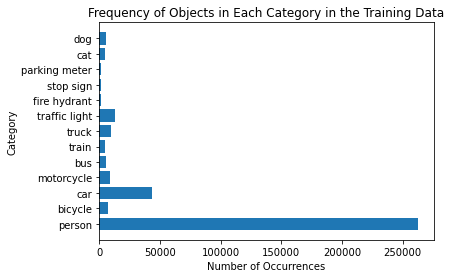

In [48]:
plt.barh(y=cat_names, width=xs)
plt.ylabel('Category')
plt.xlabel('Number of Occurrences')
plt.title('Frequency of Objects in Each Category in the Training Data');

The person category is highly represented, so for the next barplot, to better understand the distribution for categories other than "person", we will query every other category.

In [7]:
# Get the occurrences and names without the "person" category
xs_without_person = xs[1:]
cat_names_without_person = cat_names[1:]

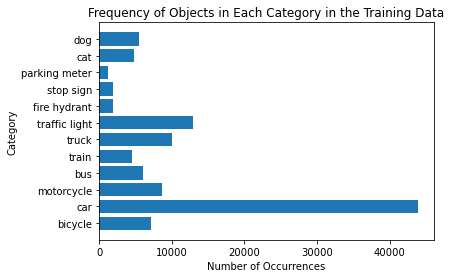

In [49]:
plt.barh(y=cat_names_without_person, width=xs_without_person)
plt.ylabel('Category')
plt.xlabel('Number of Occurrences')
plt.title('Frequency of Objects in Each Category in the Training Data');

# Visualizing images

In [9]:
# Loading COCO images
my_coco = coco.COCO(anot_path)
my_imgs = my_coco.getImgIds()

loading annotations into memory...
Done (t=21.97s)
creating index...
index created!


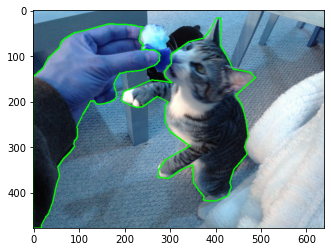

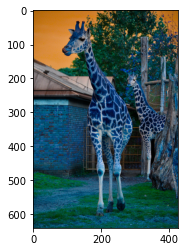

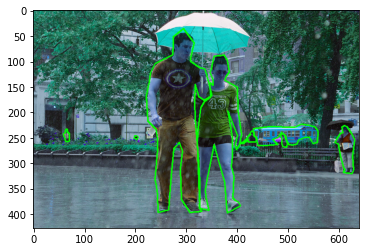

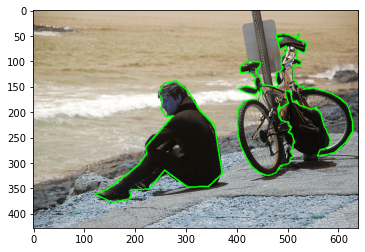

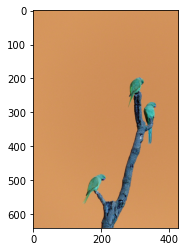

In [36]:
# Selecting 5 random images to show the segments
indices = np.random.choice(range(len(my_imgs)), 5)
for index in indices:
    # Query the individual image
    img_id = my_imgs[index]
    
    # Find the file name of the image
    file_name = my_coco.loadImgs(img_id)[0]['file_name']
    
    # Get the annotation IDs and load the annotations for the image
    ann_ids = my_coco.getAnnIds([img_id])
    annotations = my_coco.loadAnns(ann_ids)
    
    # Read the image from the image path
    img_path = os.path.join(image_folder, file_name)
    image = cv2.imread(img_path)
    
    # Iterate through each annotation for the image
    for ann in annotations:
        # Only show the segments if the category is from the categories of interest
        if ann['category_id'] in cat_ids:
            # Reshape the segments since they're in X,Y format in 1D. Making them 2D
            segs = np.array(ann['segmentation'][0]).reshape(-1, 2).astype(int)
            
            # For each segment, use CV2 to draw the line on the image
            for i in range(1, segs.shape[0]):
                cv2.line(image, segs[i-1], segs[i], (0, 255, 0), 2)
            cv2.line(image, segs[-1], segs[0], (0, 255, 0), 2)
    # Show the image
    plt.imshow(image)
    plt.show()

# Histogram for number of segments for top 3 categories

In [37]:
indices = np.random.choice(range(len(my_imgs)), 5000)
segs_dict = {}
corr_ids = [1, 3, 10]
count = 1
for index in indices:
    img_id = my_imgs[index]
    file_name = my_coco.loadImgs(img_id)[0]['file_name']
    ann_ids = my_coco.getAnnIds([img_id])
    annotations = my_coco.loadAnns(ann_ids)
    
    img_path = os.path.join(image_folder, file_name)
    image = cv2.imread(img_path)
    
    for ann in annotations:
        if ann['category_id'] in corr_ids:
            if ann['iscrowd'] == 0:
                segs = np.array(ann['segmentation'][0]).reshape(-1, 2).astype(int)
                num_edges = segs.shape[0]-1
                if ann['category_id'] in segs_dict.keys():
                    segs_dict[ann['category_id']].append(num_edges)
                else:
                    segs_dict[ann['category_id']] = [num_edges]
    # print(f"Done with image: {count}")
    count += 1

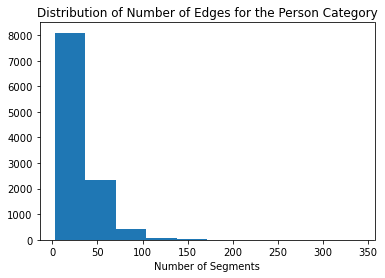

In [44]:
plt.hist(segs_dict[1])
plt.xlabel('Number of Segments')
plt.title('Distribution of Number of Edges for the Person Category');

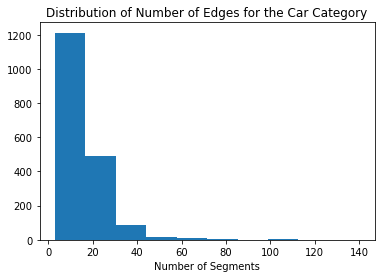

In [45]:
plt.hist(segs_dict[3])
plt.xlabel('Number of Segments')
plt.title('Distribution of Number of Edges for the Car Category');

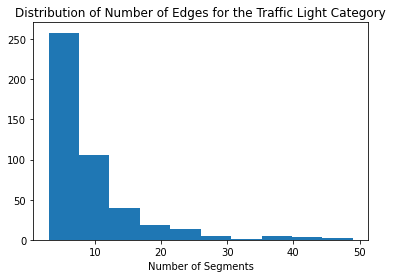

In [46]:
plt.hist(segs_dict[10])
plt.xlabel('Number of Segments')
plt.title('Distribution of Number of Edges for the Traffic Light Category');

# Ethics & Privacy

One potential ethical complication comes from the success of the model. Machines being better able to identify objects in a picture enables better spying on people. This model could easily be applied to an oculus, or oculus data, which could determine what products are in someone’s house, allowing meta to directly link a consumer to which products they buy. They will then sell this information to advertisers. With more information garnered from customers, it is easier to identify consumers in the real world, and know more about them. This is a big privacy issue.

Another potential ethical issue comes from the failure of the model. This model is necessary for many life threatening tasks, such as a self-driving vehicle and surgery. If the model incorrectly identifies something in either of these tasks, it could lead to death. A car not identifying a stop sign could run a stop and cause a car crash. Surgery AR goggles not identifying a nerve could lead to a surgeon cutting the nerve and leaving the patient paralyzed. Additionally, the data is often skewed toward certain races, which makes it better at identifying disproportionately represented races and things in their cultures.

To help address these and other potential ethical issues, we will use the tool “deon.” This has a checklist of many common issues in machine learning, and we can also modify the checklist to better suit our needs.

# Team Expectations 

* Contact over Discord group chat
* Respond to messages within 24 hours
* Most work will be divided up, some will be worked on together over meetings
* Teammates are responsible to write the code asked of them and communicate if any issues arise
* Teammates are responsible to review and understand all code
* Meetings will happen at least once a week

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/20  |  12 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research; Find dataset | 
| 4/22  |  10 AM |  Read up on dataset | Draft project proposal | 
| 4/24  | 6 PM  | Edit proposal  | Submit proposal   |
| 4/27  | 12 PM  | Everyone read up on COCO dataset and API to import the code | Discuss how to import COCO dataset; Peer reviews   |
| 5/16  | 12 PM  | Everyone try to download and analyze the COCO dataset | Go over how to analyze/import COCO data alltogether; Divide work to complete checkpoint (two people complete EDA, two people work on running models)   |
| 5/20  | 12 PM  | Complete EDA (Yash, Maitrayee), Work on running models (Gauri and Kyra) | Go over EDA completed; Go over work done on running models; Work together on running models; Complete Checkpoint writeup   |
| 5/23  | 12 PM  | Get a model to run (everyone) | Go over how to get over version conflicts to run models; Discuss Analysis Plan; Divide models to run   |
| 5/27  | 12 PM  | Reed peer review feedback, Make slight model improvements (hyperparameters) | Peer reviews; Discuss success of different models, and the analysis needed to compare them   |
| 6/2  | 12 PM  | Perform analysis of all models, reflection, speak with TA | Write full project; discuss TA feedback |
| 6/7  | 12 PM  | Make minor edits to code, make minor edits to final project | Turn in Final Project |

# Footnotes
<a name="lin"></a>1.[^](#lin): Tsung-Yi Lin, Michael Maire, et. al 2014 Microsoft COCO: Common Objects in Context. https://arxiv.org/abs/1405.0312<br> 
<a name="mwiti"></a>2.[^](#mwiti): Derrick Mwiti, Katherine (Yi) Li (5 April 2022) Image Segmentation in 2022: Architectures, Losses, Datasets, and Frameworks https://neptune.ai/blog/image-segmentation<br>
<a name="yuan"></a>3.[^](#yuan): Yuhui Yuan, Xiaokang Chen, et. al 2020 Segmentation Transformer: Object-Contextual Representations for Semantic Segmentation https://arxiv.org/pdf/1909.11065v6.pdf<br>
<a name="law"></a>4.[^](#law): Hei Law, Jia Deng, et. al 2019. CornerNet: Detecting Objects as Paired Keypoints https://arxiv.org/pdf/1808.01244.pdf <br>
<a name="zhou"></a>5.[^](#zhou): Xingyi Zhou, Dequan Wang, et. al 2019. Objects as Points https://arxiv.org/pdf/1904.07850.pdf <br>
<a name="coconote"></a>6.[^](#coco): COCO Dataset. https://cocodataset.org/#overview <br>
<a name="solawetznote"></a>7.[^](#solawetz): Solawetz, Jacob. (18 Oct 2020). An Introduction to the COCO Dataset. *Roboflow*. https://blog.roboflow.com/coco-dataset/ <br>
<a name="gandhinote"></a>8.[^](#gandhi): Gandhi, R. (2018, July 9). R-CNN, fast R-CNN, Faster R-CNN, YOLO - object detection algorithms. Medium. Retrieved April 24, 2022, from https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e <br>